In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

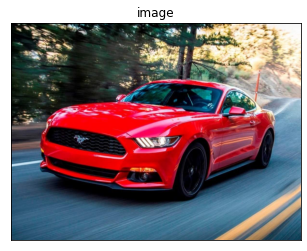

In [2]:
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('image'), plt.xticks([]), plt.yticks([])
plt.show()
# for brightening the image put value >1.0
value = 2.0
# for making the image brightness low value<1.0
#value = 0.6


hsvImg = cv.cvtColor(img,cv.COLOR_RGB2HSV)
hsvImg[...,2] = hsvImg[...,2]*value
hsvImg[...,2] = np.where(hsvImg[...,2] > 255 , 255 ,hsvImg[...,2])  
final_img = cv.cvtColor(hsvImg,cv.COLOR_HSV2RGB)

In [3]:
hsvImg.shape

(900, 1200, 3)

In [4]:
final_img = cv.cvtColor(hsvImg,cv.COLOR_HSV2RGB)

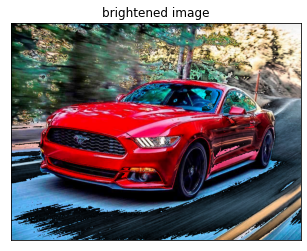

In [5]:
plt.imshow(final_img)
plt.title('brightened image'), plt.xticks([]), plt.yticks([])
plt.show()

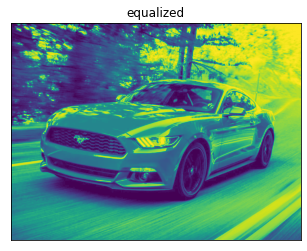

In [6]:
# HISTOGRAM EQUALISATION
#Some theory 
'''his method usually increases the global contrast of many images, especially when the usable data of the image
is represented by close contrast values.
Histogram equalization often produces unrealistic effects in photographs;
however it is very useful for scientific images like thermal, satellite or x-ray images, 
often the same class of images to which one would apply false-color. '''
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
image = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
equalize = cv.equalizeHist(image)
plt.imshow(equalize)
plt.title('equalized'), plt.xticks([]), plt.yticks([])
plt.show()

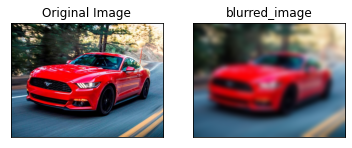

In [7]:
#GAUSSIAN BLURRING and a big size kernel
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gausblur = cv.GaussianBlur(img, (119,119),0)
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gausblur)
plt.title('blurred_image'), plt.xticks([]), plt.yticks([])
plt.show()

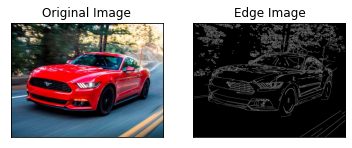

In [8]:
#canny edge detection algorithm goes through 4 steps 
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
edges = cv.Canny(img,100,200)
#cv.imshow('edgesofimg',edges)
#if cv.waitKey(0) & 0xff == 27:
#    cv.destroyAllWindows()

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
#CORNER DEECTION 
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('Corner image', img) 
cv.waitKey(0) 
cv.destroyAllWindows() 

In [10]:
#contouring
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray_sc = cv.cvtColor(img, cv.COLOR_RGB2GRAY) 
edged = cv.Canny(gray_sc, 30, 200)  
contours, hierarchy = cv.findContours(edged,  
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) 
  
cv.imshow('Canny Edges After Contouring', edged) 
cv.waitKey(0) 
print("Number of Contours found = " + str(len(contours))) 
# -1 signifies drawing all contours 
cv.drawContours(img, contours, -1, (0, 255, 0), 3) 
  
cv.imshow('Contours', img) 
cv.waitKey(0) 
cv.destroyAllWindows() 

Number of Contours found = 1123


In [11]:

# THRESHOLDING
img = cv.imread("thumb.cms.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray_sc = cv.cvtColor(img, cv.COLOR_RGB2GRAY) 
ret,thresh1 = cv.threshold(gray_sc,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(gray_sc,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(gray_sc,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(gray_sc,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(gray_sc,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
cv.imshow('Binary Threshold', thresh1) 
cv.waitKey(0)
cv.imshow('Binary Threshold Inverted', thresh2)
cv.waitKey(0)
cv.imshow('Truncated Threshold', thresh3) 
cv.waitKey(0)
cv.imshow('Set to 0', thresh4)
cv.waitKey(0)
cv.imshow('Set to 0 Inverted', thresh5)
cv.waitKey(0)
     

48

In [3]:
#SUBSTRACTING BACKGROUND IMAGE 
img = cv.imread("index.jpeg")
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
fgbg1 = cv.createBackgroundSubtractorMOG2()
fgmask1 = fgbg1.apply(img1)
cv.imshow('Original', img1)
cv.waitKey(0)
cv.imshow('MOG2', fgmask1) 
cv.waitKey(0)

48

In [6]:
#SHARPENING 
img = cv.imread("index.jpeg")
cv.imshow('Original', img)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv.filter2D(img, -1, kernel_sharpening)
cv.imshow('Image Sharpening', sharpened)
cv.waitKey(0)
cv.destroyAllWindows()